# LangChain으로 데이터 분석하기 - Excel

## 발급 받은 OpenAI key를 불러옵니다.

In [ ]:
import os

os.environ["OPENAI_API_KEY"] = ''

## 데이터 시각화
- 전처리한 데이터프레임에 대해 LangChain을 이용하여 데이터 분석을 수행하고 시각화를 통해 인사이트를 추출해보도록 하겠습니다.

In [2]:
import pandas as pd

df = pd.read_csv("data/pp_df.csv")

In [3]:
df

,단지명,층,건축년도,구,동,계약월,거래금액(억),유형,평
0,개포6차우성아파트1동~8동,4,1987,강남구,개포동,4,22.00,중형,24.23
1,개포6차우성아파트1동~8동,2,1987,강남구,개포동,4,22.00,중형,24.23
2,개포6차우성아파트1동~8동,2,1987,강남구,개포동,5,21.60,중형,24.23
3,개포래미안포레스트,13,2020,강남구,개포동,4,36.90,대형,31.01
4,개포래미안포레스트,17,2020,강남구,개포동,5,42.00,대형,41.23
...,...,...,...,...,...,...,...,...,...
12644,한신아파트(103~109),20,1997,중랑구,중화동,3,7.30,소형,18.11
12645,한신아파트(103~109),3,1997,중랑구,중화동,7,7.40,소형,18.11
12646,한신아파트(103~109),12,1997,중랑구,중화동,7,9.15,중형,25.46
12647,한영(101),7,2003,중랑구,중화동,4,4.99,중형,25.66


### 이전 프로젝트에서 정의했던 reset_agent 함수를 다시 불러옵니다.

In [4]:
from langchain_experimental.agents import create_pandas_dataframe_agent
from langchain.chat_models import ChatOpenAI

def reset_agent(df, model='gpt-3.5-turbo',temperature=0, verbose=True):
    return create_pandas_dataframe_agent(ChatOpenAI(temperature=0, model=model), df, verbose=verbose)

agent = reset_agent(df)

/tmp/ipykernel_2307/3035348083.py:5: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  return create_pandas_dataframe_agent(ChatOpenAI(temperature=0, model=model), df, verbose=verbose)


### Point 1. 비싼 아파트 순으로 살펴보기

In [5]:
agent.run(input())

/tmp/ipykernel_2307/2623292154.py:1: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  agent.run(input())




> Entering new AgentExecutor chain...
Thought: I need to sort the dataframe `df` by the column '거래금액(억)' in descending order.
Action: python_repl_ast
Action Input: df_sorted = df.sort_values(by='거래금액(억)', ascending=False)I now know the final answer
Final Answer: df_sorted = df.sort_values(by='거래금액(억)', ascending=False)

> Finished chain.


"df_sorted = df.sort_values(by='거래금액(억)', ascending=False)"

In [8]:
df_sorted = df.sort_values(by='거래금액(억)', ascending=False)
df_sorted

,단지명,층,건축년도,구,동,계약월,거래금액(억),유형,평
762,PH129,16,2020,강남구,청담동,4,145.00,대형,83.02
11098,파르크한남,5,2020,용산구,한남동,4,135.00,대형,81.42
8308,아크로서울포레스트,47,2020,성동구,성수동1가,9,130.00,대형,80.17
11103,한남더힐,3,2011,용산구,한남동,5,110.00,대형,72.82
11085,나인원한남,8,2019,용산구,한남동,11,94.50,대형,62.70
...,...,...,...,...,...,...,...,...,...
10440,쌍용플래티넘S,7,2013,영등포구,대림동,9,0.67,소형,5.30
10441,쌍용플래티넘S,7,2013,영등포구,대림동,9,0.67,소형,5.30
10442,쌍용플래티넘S,7,2013,영등포구,대림동,9,0.67,소형,5.30
10443,쌍용플래티넘S,7,2013,영등포구,대림동,9,0.67,소형,5.30


#### 그래프에 한글 깨짐을 해결하기 위한 코드입니다. NanumGothic 폰트를 사용하겠습니다. - 출처: 네이버, 네이버 문화재단

In [9]:
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

# 반드시 글꼴 주소 입력해주세요!
fe = fm.FontEntry(fname='NanumGothic.ttf', name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})
plt.rcParams["axes.unicode_minus"] = False

#### 경고 메세지가 뜨지 않게 하기 위한 코드입니다.

In [10]:
import warnings
warnings.filterwarnings("ignore")

### 가장 비싼 아파트 Top10의 가격에 대한 시각화를 해보겠습니다.



> Entering new AgentExecutor chain...
Thought: We need to sort the dataframe by 거래금액(억) in descending order and then select the top 10 rows for visualization using matplotlib.pyplot.
Action: python_repl_ast
Action Input: df_sorted = df.sort_values('거래금액(억)', ascending=False).head(10)We need to plot the data now.
Action: python_repl_ast
Action Input: import matplotlib.pyplot as pltNow, let's create a bar plot to visualize the top 10 most expensive apartments.
Action: python_repl_ast
Action Input: plt.figure(figsize=(12, 6))Figure(1200x600)We should set the x-axis as the 단지명 and the y-axis as the 거래금액(억) for the bar plot.
Action: python_repl_ast
Action Input: plt.bar(df_sorted['단지명'], df_sorted['거래금액(억)'])<BarContainer object of 10 artists>We should add labels and title to the plot for better understanding.
Action: python_repl_ast
Action Input: plt.xlabel('아파트 이름')Text(0.5, 0, '아파트 이름')We should add a label for the x-axis.
Action: python_repl_ast
Action Input: plt.ylabel('거래금액(억)')Text

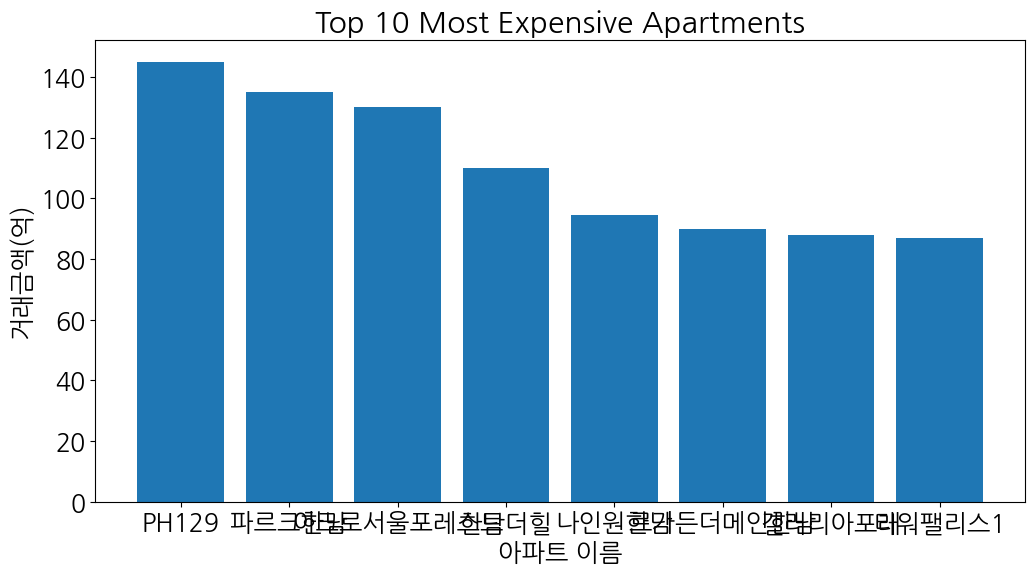

I now know the final answer
Final Answer: 
```python
import matplotlib.pyplot as plt

df_sorted = df.sort_values('거래금액(억)', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(df_sorted['단지명'], df_sorted['거래금액(억)'])
plt.xlabel('아파트 이름')
plt.ylabel('거래금액(억)')
plt.title('Top 10 Most Expensive Apartments')
plt.show()
```

> Finished chain.


"```python\nimport matplotlib.pyplot as plt\n\ndf_sorted = df.sort_values('거래금액(억)', ascending=False).head(10)\n\nplt.figure(figsize=(12, 6))\nplt.bar(df_sorted['단지명'], df_sorted['거래금액(억)'])\nplt.xlabel('아파트 이름')\nplt.ylabel('거래금액(억)')\nplt.title('Top 10 Most Expensive Apartments')\nplt.show()\n```"

In [14]:
agent.run(input())

### Point 2. 높은 아파트 순으로 살펴보기

### Point 3. 아파트 평수 유형에 따른 빈도 살펴보기

### Point 4. 월별 거래량 그래프 시각화하기

### Point 5. 동 기준으로 아파트 가격 살펴보기

### Point 6. 구 기준으로 아파트 평수 살펴보기

### Point 7. 상관관계 분석하기

### Scatter Plot 그려보기